In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
input_size = 784
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100       
learning_rate = 0.01 


In [3]:
train_dataset = torchvision.datasets.MNIST(root='./data',train = True,transform = transforms.ToTensor(), download= True)

In [4]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [5]:
test_dataset = torchvision.datasets.MNIST(root='./data',train = False,transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle = False)

In [6]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape,labels.shape)
# next(examples)
print(len(train_loader))


torch.Size([100, 1, 28, 28]) torch.Size([100])
600


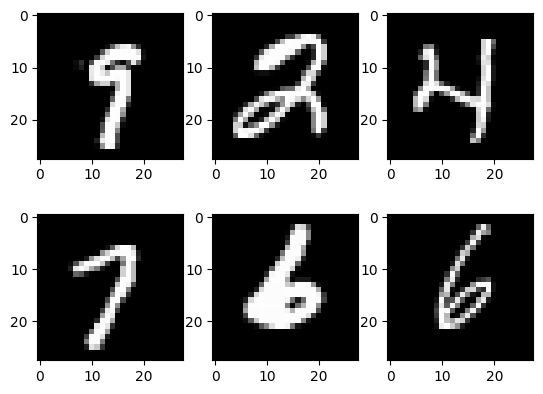

In [7]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [8]:
class NeuralNet(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

### Model
model = NeuralNet(input_size, hidden_size, num_classes)

In [9]:
# Loss and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [10]:
#training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        #100 , 1 ,28 , 28
        # 100, 784
        images = images.reshape(-1, 28*28)

        #forward pass
        outputs = model(images)
        loss = criterion(outputs , labels)

        #backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1)%100 == 0:
           print(f'epoch: {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}') 
        

epoch: 1/2, step 100/600, loss = 0.2315
epoch: 1/2, step 200/600, loss = 0.2892
epoch: 1/2, step 300/600, loss = 0.1612
epoch: 1/2, step 400/600, loss = 0.0711
epoch: 1/2, step 500/600, loss = 0.1052
epoch: 1/2, step 600/600, loss = 0.2723
epoch: 2/2, step 100/600, loss = 0.1186
epoch: 2/2, step 200/600, loss = 0.0602
epoch: 2/2, step 300/600, loss = 0.0426
epoch: 2/2, step 400/600, loss = 0.1346
epoch: 2/2, step 500/600, loss = 0.0630
epoch: 2/2, step 600/600, loss = 0.1692


In [11]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1,28*28)
        outputs = model(images)

        #value, index
        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct += (predictions == labels).sum().item()

    acc = 100.0*(n_correct/n_samples)
    print(f'accuracy = {acc}')

accuracy = 96.56


In [12]:
# batch size = 100 => accuracu = 96.99
# batch size = 200 => accuracy = 96.55
# batch size = 300 => accuracy = 96.69
#lr = 0.001 => accuracy = 95.38
#lr = 0.01 => accuracy = 96.99
#lr = 0.02 => accuracy = 95.26
# hidden size = 100 => accuracy = 95.82
# hidden size = 200 => accuracy = 95.61
# hidden size = 300 => accuracy = 96.28

### So our model predicts with best accuracy under following hyper parameters:
        #input_size = 784
        #hidden_size = 100
        # num_classes = 10
        # num_epochs = 2
        # batch_size = 100       
        # learning_rate = 0.01 